# Metadata

```{yaml}
Course:   DS 5001 Exploratory Text Analytics
Module:   01 Getting Started
Topic:    Lab: First Foray
Author:   R.C. Alvarado
Date:     14 October 2022 (revised)
```

**Purpose**:  We take a raw text file from Project Gutenberg and convert it into a dataframe of tokens. We then explore some properties of the data. The main idea is to get acquainted with the primary process of convert text into analytical form.

# Set Up

In [2]:
import pandas as pd

# Import File

In [3]:
lines = open('pg105.txt', 'r').readlines()

In [4]:
lines[:5]

['Persuasion by Jane Austen (1818)\n', '\n', '\n', '\n', 'Chapter 1\n']

In [5]:
lines[-5:]

['the tax of quick alarm for belonging to that profession which is, if\n',
 'possible, more distinguished in its domestic virtues than in its\n',
 'national importance.\n',
 '\n',
 'Finis']

# Convert to Dataframe

In [6]:
text = pd.DataFrame(lines)

In [7]:
text.sample(10)

,0
170,"He was at that time a very young man, just eng..."
3556,"Captain Benwick obeyed, and Charles at the sam..."
117,It sometimes happens that a woman is handsomer...
4912,in each other more than re-kindled. The first...
3687,"instantly. Musgrove, either you or I must go.""\n"
3994,had passed into better hands than its owners'....
4801,"awkward, that she would never have been tolera..."
997,aggravation.\n
8275,There she felt her own inferiority very keenly...
7216,Her plan of sitting with Lady Russell must giv...


In [8]:
text.columns = ['line_str']

In [9]:
text.head()

,line_str
0,Persuasion by Jane Austen (1818)\n
1,\n
2,\n
3,\n
4,Chapter 1\n


In [10]:
text.index.name = 'line_num'

In [11]:
text.head()

,line_str
line_num,
0,Persuasion by Jane Austen (1818)\n
1,\n
2,\n
3,\n
4,Chapter 1\n


# Extract Simple Features

In [12]:
text['len'] = text.line_str.str.len()

In [13]:
text.len.describe()

count    8317.000000
mean       56.131658
std        25.013216
min         1.000000
25%        62.000000
50%        69.000000
75%        71.000000
max        74.000000
Name: len, dtype: float64

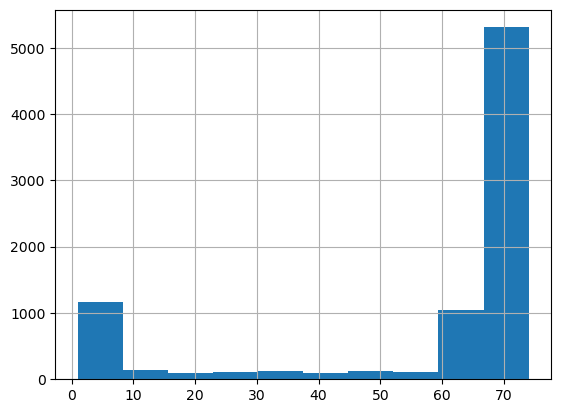

In [14]:
text.len.hist();

**Why two humps?** What might this bimodal distribution indicate?

Let's look at the first hump for characters.

In [15]:
text[text['len'] < 5].sample(10)

,line_str,len
line_num,,
6324,\n,1
6316,\n,1
2004,\n,1
600,\n,1
7769,\n,1
7862,\n,1
4283,\n,1
4194,\n,1
1789,\n,1


# Import Again

Now that we know what line breaks mean, we can use this information to import the file with a more accurate structure. Note also that we could have inferred this from visual inspection, too. But the principle that statistical features can provide evidence for structure remains -- we will use this throughout the course.

## Interpret line breaks `\n\n`

In [16]:
chunk_pat = '\n\n'

In [17]:
chunks = open('pg105.txt', 'r').read().split(chunk_pat)

In [24]:
chunks[:5]

['Persuasion by Jane Austen (1818)',
 '',
 'Chapter 1',
 'Sir Walter Elliot, of Kellynch Hall, in Somersetshire, was a man who,\nfor his own amusement, never took up any book but the Baronetage; there\nhe found occupation for an idle hour, and consolation in a distressed\none; there his faculties were roused into admiration and respect, by\ncontemplating the limited remnant of the earliest patents; there any\nunwelcome sensations, arising from domestic affairs changed naturally\ninto pity and contempt as he turned over the almost endless creations\nof the last century; and there, if every other leaf were powerless, he\ncould read his own history with an interest which never failed.  This\nwas the page at which the favourite volume always opened:',
 '           "ELLIOT OF KELLYNCH HALL.']

In [19]:
text = pd.DataFrame(chunks, columns=['chunk_str'])
text.index.name = 'chunk_id'

In [20]:
text.head()

,chunk_str
chunk_id,
0,Persuasion by Jane Austen (1818)
1,
2,Chapter 1
3,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
4,"""ELLIOT OF KELLYNCH HALL."


In [21]:
text.shape

(1056, 1)

## Remove remaining breaks

In [22]:
text.chunk_str = text.chunk_str.str.replace('\n+', ' ', regex=True).str.strip()

In [23]:
text.head()

,chunk_str
chunk_id,
0,Persuasion by Jane Austen (1818)
1,
2,Chapter 1
3,"Sir Walter Elliot, of Kellynch Hall, in Somers..."
4,"""ELLIOT OF KELLYNCH HALL."


# Convert Lines to Tokens

`K`: A dataframe of tokens.

Note the `expand` argument to the `.split()` method.

In [47]:
K = text.chunk_str.str.split(expand=True).stack().to_frame('token_str')
K.index.names = ['chunk_num','token_num']

In [48]:
K

token_str
chunk_num token_num             
0         0           Persuasion
          1                   by
          2                 Jane
          3               Austen
          4               (1818)
...                          ...
1054      165                 in
          166                its
          167           national
          168        importance.
1055      0                Finis

[83283 rows x 1 columns]

Broken down into steps

In [24]:
# text.chunk_str.str.split()

In [25]:
# text.chunk_str.str.split(expand=True)

In [26]:
# text.chunk_str.str.split(expand=True).stack()

In [27]:
# text.chunk_str.str.split(expand=True).stack().to_frame('token_str')

In [50]:
K.iloc[100:120]

token_str
chunk_num token_num           
3         93               his
          94               own
          95           history
          96              with
          97                an
          98          interest
          99             which
          100            never
          101          failed.
          102             This
          103              was
          104              the
          105             page
          106               at
          107            which
          108              the
          109        favourite
          110           volume
          111           always
          112          opened:

# Do Some Cleaning

In [51]:
K['term_str'] = K.token_str.str.replace(r'\W+', '', regex=True).str.lower()

In [52]:
K.sample(10)

,,token_str,term_str
chunk_num,token_num,,
947,55,very,very
1019,20,for,for
433,118,of,of
95,29,over-anxious,overanxious
763,28,many,many
918,43,ever,ever
625,170,to,to
648,13,bore,bore
689,31,come,come


# Extract a Vocabulary

`V`: A table of terms. As opposed to tokens, which are term _instances_.

**Terms** are symbol **types**.

**Tokens** are symbol **instances**.

In [53]:
V = K.term_str.value_counts().to_frame('n')
V.index.name = 'term_str'

In [54]:
V.head(10)

,n
term_str,
the,3326
to,2782
and,2781
of,2565
a,1591
in,1382
was,1335
her,1202
had,1187


Define relative frequency, an estimate of the probability of the word.

In [55]:
V['p'] = V.n / V.n.sum()

# Visualize Frequent Words

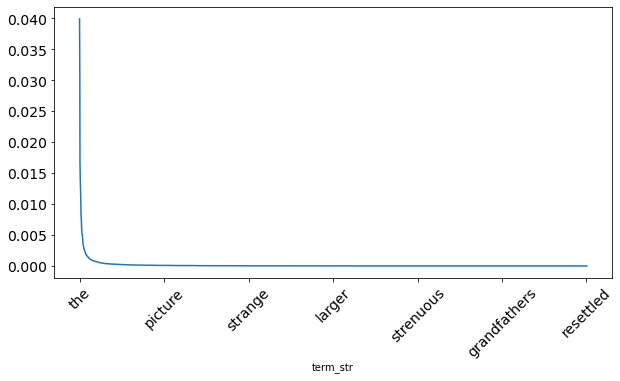

In [56]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False);

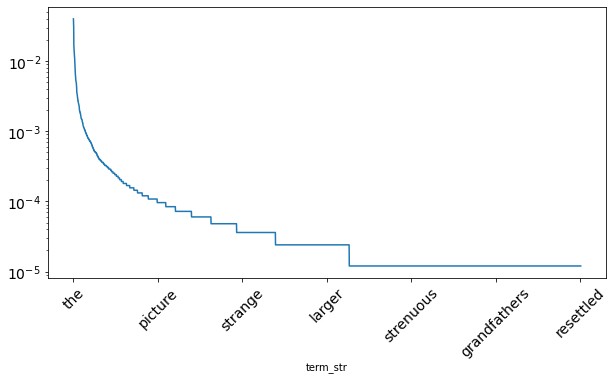

In [57]:
V.p.plot(figsize=(10,5), fontsize=14, rot=45, legend=False, logy=True);

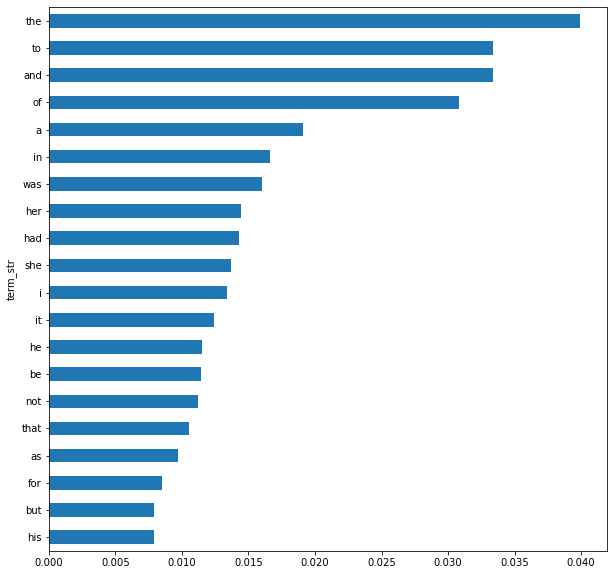

In [58]:
V.p.head(20).sort_values().plot.barh(figsize=(10,10));

# The The

Why is "the" the most frequent word?

Consider that "the" is "[The Most Powerful Word in the English Language](http://www.bbc.com/culture/story/20200109-is-this-the-most-powerful-word-in-the-english-language)."

> ... ‘the’ lies at the heart of English grammar, having a function rather than a meaning. Words are split into two categories: expressions with a semantic meaning and functional words like ‘the’, ‘to’, ‘for’, with a job to do. ‘The’ can function in multiple ways. This is typical, explains Gary Thoms, assistant professor in linguistics at New York University: “a super high-usage word will often develop a real flexibility”, with different subtle uses that make it hard to define. Helping us understand what is being referred to, ‘the’ makes sense of nouns as a subject or an object. So even someone with a rudimentary grasp of English can tell the difference between ‘I ate an apple’ and ‘I ate the apple’.

Note: function vs. meaning ...

> **Function words are very specific to each language.**<br/><br/>
So, someone who is a native Hindi or Russian speaker is going to have to think very differently when constructing a sentence in English. Murphy says that she has noticed, for instance, that sometimes her Chinese students hedge their bets and include ‘the’ where it is not required. Conversely, Smith describes Russian friends who are so unsure when to use ‘the’ that they sometimes leave a little pause: ‘I went into... bank. I picked up... pen.’ English speakers learning a language with no equivalent of ‘the’ also struggle and might overcompensate by using words like ‘this’ and ‘that’ instead.

# Save Work

In [59]:
K.to_csv("ff-TOKENS.csv")
V.to_csv("ff-VOCAB.csv")